Name : Hanish Sai Rohit
email id: hanishsidhu@gmail.com
email id: hanishrohit@gmail.com

<h1 style="text-align:center;font-size:30px;" > Microsoft Malware Detection </h1>

<h1> Problem Statement </h1>

<p>
<b>identify whether a given piece of file/software<b> is a malware. 
</p>

<h2> Real-world/Business objectives and constraints.</h2>

1. Minimize multi-class error.
2. Multi-class probability estimates.
3. Malware detection should not take hours and block the user's computer. It should fininsh in a few seconds or a minute.

<h1>Machine Learning Problem</h1>

<h2>Data</h2>

<h3>Data Overview </h3>

<li> For every malware, we have two files <ol> <li> .asm file ) </li><li>.bytes file (the raw data contains the hexadecimal representation of the file's binary content, without the PE header)</li></ol></li> 
    
<li>Total train dataset consist of 200GB data out of which 50Gb of data is .bytes files and 150GB of data is .asm files:  </li>
<li><b>Lots of Data for a single-box/computer.</b> </li>

<li>There are total 10,868 .bytes files and 10,868 asm files total 21,736 files </li>

<li>There are 9 types of malwares (9 classes) in our give data</li>
<li> Types of Malware:
    <ol>
        <li> Ramnit </li>
        <li> Lollipop </li>
        <li> Kelihos_ver3 </li>
        <li> Vundo </li>
        <li> Simda </li>
        <li> Tracur </li>
        <li> Kelihos_ver1 </li>
        <li> Obfuscator.ACY </li>
        <li> Gatak </li>
    </ol>
</li>

<h3> Example Data Point</h3>

<p style = "font-size:18px"><b> .asm file</b></p>
<pre>
.text:00401000								       assume es:nothing, ss:nothing, ds:_data,	fs:nothing, gs:nothing
.text:00401000 56							       push    esi
.text:00401001 8D 44 24	08						       lea     eax, [esp+8]
.text:00401005 50							       push    eax
.text:00401006 8B F1							       mov     esi, ecx
.text:00401008 E8 1C 1B	00 00						       call    ??0exception@std@@QAE@ABQBD@Z ; std::exception::exception(char const * const &)
.text:0040100D C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401013 8B C6							       mov     eax, esi
.text:00401015 5E							       pop     esi
.text:00401016 C2 04 00							       retn    4
.text:00401016						       ; ---------------------------------------------------------------------------
.text:00401019 CC CC CC	CC CC CC CC					       align 10h
.text:00401020 C7 01 08	BB 42 00					       mov     dword ptr [ecx],	offset off_42BB08
.text:00401026 E9 26 1C	00 00						       jmp     sub_402C51
.text:00401026						       ; ---------------------------------------------------------------------------
.text:0040102B CC CC CC	CC CC						       align 10h
.text:00401030 56							       push    esi
.text:00401031 8B F1							       mov     esi, ecx
.text:00401033 C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401039 E8 13 1C	00 00						       call    sub_402C51
.text:0040103E F6 44 24	08 01						       test    byte ptr	[esp+8], 1
.text:00401043 74 09							       jz      short loc_40104E
.text:00401045 56							       push    esi
.text:00401046 E8 6C 1E	00 00						       call    ??3@YAXPAX@Z    ; operator delete(void *)
.text:0040104B 83 C4 04							       add     esp, 4
.text:0040104E
.text:0040104E						       loc_40104E:			       ; CODE XREF: .text:00401043j
.text:0040104E 8B C6							       mov     eax, esi
.text:00401050 5E							       pop     esi
.text:00401051 C2 04 00							       retn    4
.text:00401051						       ; ---------------------------------------------------------------------------
</pre>
<p style = "font-size:18px"><b> .bytes file</b></p>
<pre>
00401000 00 00 80 40 40 28 00 1C 02 42 00 C4 00 20 04 20
00401010 00 00 20 09 2A 02 00 00 00 00 8E 10 41 0A 21 01
00401020 40 00 02 01 00 90 21 00 32 40 00 1C 01 40 C8 18
00401030 40 82 02 63 20 00 00 09 10 01 02 21 00 82 00 04
00401040 82 20 08 83 00 08 00 00 00 00 02 00 60 80 10 80
00401050 18 00 00 20 A9 00 00 00 00 04 04 78 01 02 70 90
00401060 00 02 00 08 20 12 00 00 00 40 10 00 80 00 40 19
00401070 00 00 00 00 11 20 80 04 80 10 00 20 00 00 25 00
00401080 00 00 01 00 00 04 00 10 02 C1 80 80 00 20 20 00
00401090 08 A0 01 01 44 28 00 00 08 10 20 00 02 08 00 00
004010A0 00 40 00 00 00 34 40 40 00 04 00 08 80 08 00 08
004010B0 10 00 40 00 68 02 40 04 E1 00 28 14 00 08 20 0A
004010C0 06 01 02 00 40 00 00 00 00 00 00 20 00 02 00 04
004010D0 80 18 90 00 00 10 A0 00 45 09 00 10 04 40 44 82
004010E0 90 00 26 10 00 00 04 00 82 00 00 00 20 40 00 00
004010F0 B4 00 00 40 00 02 20 25 08 00 00 00 00 00 00 00
00401100 08 00 00 50 00 08 40 50 00 02 06 22 08 85 30 00
00401110 00 80 00 80 60 00 09 00 04 20 00 00 00 00 00 00
00401120 00 82 40 02 00 11 46 01 4A 01 8C 01 E6 00 86 10
00401130 4C 01 22 00 64 00 AE 01 EA 01 2A 11 E8 10 26 11
00401140 4E 11 8E 11 C2 00 6C 00 0C 11 60 01 CA 00 62 10
00401150 6C 01 A0 11 CE 10 2C 11 4E 10 8C 00 CE 01 AE 01
00401160 6C 10 6C 11 A2 01 AE 00 46 11 EE 10 22 00 A8 00
00401170 EC 01 08 11 A2 01 AE 10 6C 00 6E 00 AC 11 8C 00
00401180 EC 01 2A 10 2A 01 AE 00 40 00 C8 10 48 01 4E 11
00401190 0E 00 EC 11 24 10 4A 10 04 01 C8 11 E6 01 C2 00

</pre>

<h2> Mapping the real-world problem to an ML problem</h2>

<h3>  Type of Machine Learning Problem </h3>

<p>
    
            There are nine different classes of malware that we need to classify a given a data point => Multi class classification problem    
</p>

<h3> Performance Metric</h3>

* Multi class log-loss 
* Confusion matrix 

<h3> Machine Learing Objectives and Constraints </h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>


Constraints :
    * Class probabilities are needed.
    * Penalize the errors in class probabilites => Metric is Log-loss.
    * Some Latency constraints.

<h2> Train and Test Dataset </h2>

Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

# Data Preprocessing 

In [1]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process
import multiprocessing
import codecs 
import random as r
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import log_loss
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix
%matplotlib inline
from tqdm import tqdm
import numpy as np
import scipy.misc, array

In [16]:
#separating byte files and asm files 

source = 'asmFiles'
destination = 'byteFiles'

if not os.path.isdir(destination):
    os.makedirs(destination)

if os.path.isdir(source):
    os.rename(source,'asmFiles')
    source='asmFiles/'
    data_files = os.listdir(source)
    for file in data_files:
        if (file.endswith("bytes")):
            shutil.move(source+file,destination)

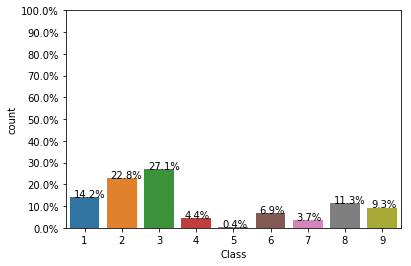

In [5]:
%matplotlib inline

Y=pd.read_csv("trainLabels.csv")
total = len(Y)*1.
ax=sns.countplot(x="Class", data=Y)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

observation:
    * It's an imbalanced dataset.

In [20]:
# remove starting address

files = os.listdir('byteFiles')
filenames=[]
array=[]
for file in files:
    if(file.endswith("bytes")):
        text_file = open('byteFiles/'+file.split('.')[0]+".txt", 'w+')
        with open('byteFiles/'+file) as fp:
            lines=""
            for line in fp:
                a=line.rstrip().split(" ")[1:]
                b=' '.join(a)
                b=b+"\n"
                text_file.write(b)
            fp.close()
            os.remove('byteFiles/'+file)
        text_file.close()

In [136]:
import random as r

In [117]:
hexa_sting = "00,01,02,03,04,05,06,07,08,09,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??"
hexa_list = hexa_sting.split(",")
hexa_decimals_dict ={}

count =0
for hexa_decimal in hexa_list:
    hexa_decimals_dict.update({hexa_decimal : count})
    count = count +1

In [151]:
if not os.path.isdir('byte_folders'):
        os.makedirs('byte_folders')

In [153]:
folder_1 ='01'
folder_2 ='02'
folder_3 ='03'
folder_4 ='04'
folder_5 ='05'
folder_6 ='06'
folder_7 ='07'
folder_8 ='08'
folder_9 ='09'
folder_10='10'
folder_11='11'
folder_12='12'
folder_13='13'
folder_14='14'
folder_15='15'
folder_16='16'
folder_17='17'
folder_18='18'
folder_19='19'
folder_20='20'
folder_21='21'
folder_22='22'
folder_23='output'

for i in [folder_1,folder_2,folder_3,folder_4,folder_5,folder_6,folder_7,folder_8,folder_9,folder_10,folder_11,folder_12,folder_13,folder_14,folder_15,folder_16,folder_17,folder_18,folder_19,folder_20,folder_21,folder_22,folder_23]:
    if not os.path.isdir("byte_folders/"+i):
        os.makedirs("byte_folders/"+i)


In [154]:
from tqdm import tqdm

source='byteFiles/'
destination_ ='byte_folders/'
files = os.listdir('byteFiles')

for i in tqdm(range(0,10868)):
    if i % 21==0:
        shutil.move(source+files[i],destination_+'01')
    elif i%21==1:
        shutil.move(source+files[i],destination_+'02')
    elif i%21 ==2:
        shutil.move(source+files[i],destination_+'03')
    elif i%21 ==3:
        shutil.move(source+files[i],destination_+'04')
    elif i%21==4:
        shutil.move(source+files[i],destination_+'05')
    elif i%21==5:
        shutil.move(source+files[i],destination_+'06')
    elif i%21==6:
        shutil.move(source+files[i],destination_+'07')
    elif i%21==7:
        shutil.move(source+files[i],destination_+'08')
    elif i%21==8:
        shutil.move(source+files[i],destination_+'09')
    elif i%21==9:
        shutil.move(source+files[i],destination_+'10')
    elif i%21==10:
        shutil.move(source+files[i],destination_+'11')
    elif i%21==11:
        shutil.move(source+files[i],destination_+'12')
    elif i%21==12:
        shutil.move(source+files[i],destination_+'13')
    elif i%21==13:
        shutil.move(source+files[i],destination_+'14')
    elif i%21==14:
        shutil.move(source+files[i],destination_+'15')
    elif i%21==15:
        shutil.move(source+files[i],destination_+'16')
    elif i%21==16:
        shutil.move(source+files[i],destination_+'17')
    elif i%21==17:
        shutil.move(source+files[i],destination_+'18')
    elif i%21==18:
        shutil.move(source+files[i],destination_+'19')
    elif i%21==19:
        shutil.move(source+files[i],destination_+'20')
    elif i%21==20:
        shutil.move(source+files[i],destination_+'21')
 

100%|██████████| 10868/10868 [00:00<00:00, 30723.90it/s]


# Featurization

### Bi-grams Reprsentation of Byte Files

In [2]:
hexa_sting = "00,01,02,03,04,05,06,07,08,09,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??"
hexa_list = hexa_sting.split(",")
hexa_decimals_dict ={}

count =0
for hexa_decimal in hexa_list:
    hexa_decimals_dict.update({hexa_decimal : count})
    count = count +1

In [3]:
if not os.path.isdir("byte_folders/output"):
    os.makedirs("byte_folders/output")

In [4]:
from tqdm import tqdm

def firstprocess():
    files = os.listdir('byte_folders/01')

    byte_feature_file=open('byte_folders/output/bigrams_01.csv','w+')

    iu1 = np.triu_indices(len(hexa_list))


    for file in tqdm(files):
    
        dimmensions_matrix = np.random.normal(loc=0,scale=0,size=tuple([len(hexa_list),len(hexa_list)]))
    
        if(file.endswith("txt")):
            with open('byte_folders/01/'+file,"r") as byte_flie:
                for lines in byte_flie:
                    line=lines.rstrip().split(" ")
                
                    for word_index in range(0,len(line)):
                    
                        if word_index < len(line)-1:
                        
                            word1 = line[word_index]
                            word_index_2 = word_index + 1
                            word2 = line[word_index_2]
                        
                            word1 = word1.lower()
                            word2 = word2.lower()
                    
                    
                            index1 = hexa_decimals_dict[word1]
                            index2 = hexa_decimals_dict[word2]
                    
                            dimmensions_matrix[index1][index2] = dimmensions_matrix[index1][index2] + 1
                    
                    
            byte_flie.close()
       
        dimmensions_matrix = dimmensions_matrix + dimmensions_matrix.T
        dimmensions_matrix = dimmensions_matrix - np.diag(np.diag(dimmensions_matrix))
        dimmensions_array = dimmensions_matrix[iu1]
    
        byte_feature_file.write(file+",")
        for i in dimmensions_array:
            byte_feature_file.write(str(i)+",")
        byte_feature_file.write("\n")
    

    byte_feature_file.close()

def secondprocess():
    files = os.listdir('byte_folders/02')

    byte_feature_file=open('byte_folders/output/bigrams_02.csv','w+')

    iu1 = np.triu_indices(len(hexa_list))


    for file in files:
    
        dimmensions_matrix = np.random.normal(loc=0,scale=0,size=tuple([len(hexa_list),len(hexa_list)]))
    
        if(file.endswith("txt")):
            with open('byte_folders/02/'+file,"r") as byte_flie:
                for lines in byte_flie:
                    line=lines.rstrip().split(" ")
                
                    for word_index in range(0,len(line)):
                    
                        if word_index < len(line)-1:
                        
                            word1 = line[word_index]
                            word_index_2 = word_index + 1
                            word2 = line[word_index_2]
                        
                            word1 = word1.lower()
                            word2 = word2.lower()
                    
                    
                            index1 = hexa_decimals_dict[word1]
                            index2 = hexa_decimals_dict[word2]
                    
                            dimmensions_matrix[index1][index2] = dimmensions_matrix[index1][index2] + 1
                    
                    
            byte_flie.close()
       
        dimmensions_matrix = dimmensions_matrix + dimmensions_matrix.T
        dimmensions_matrix = dimmensions_matrix - np.diag(np.diag(dimmensions_matrix))
        dimmensions_array = dimmensions_matrix[iu1]
    
        byte_feature_file.write(file+",")
        for i in dimmensions_array:
            byte_feature_file.write(str(i)+",")
        byte_feature_file.write("\n")
    

    byte_feature_file.close()

def thirdprocess():
    files = os.listdir('byte_folders/03')

    byte_feature_file=open('byte_folders/output/bigrams_03.csv','w+')

    iu1 = np.triu_indices(len(hexa_list))


    for file in files:
    
        dimmensions_matrix = np.random.normal(loc=0,scale=0,size=tuple([len(hexa_list),len(hexa_list)]))
    
        if(file.endswith("txt")):
            with open('byte_folders/03/'+file,"r") as byte_flie:
                for lines in byte_flie:
                    line=lines.rstrip().split(" ")
                
                    for word_index in range(0,len(line)):
                    
                        if word_index < len(line)-1:
                        
                            word1 = line[word_index]
                            word_index_2 = word_index + 1
                            word2 = line[word_index_2]
                        
                            word1 = word1.lower()
                            word2 = word2.lower()
                    
                    
                            index1 = hexa_decimals_dict[word1]
                            index2 = hexa_decimals_dict[word2]
                    
                            dimmensions_matrix[index1][index2] = dimmensions_matrix[index1][index2] + 1
                    
                    
            byte_flie.close()
       
        dimmensions_matrix = dimmensions_matrix + dimmensions_matrix.T
        dimmensions_matrix = dimmensions_matrix - np.diag(np.diag(dimmensions_matrix))
        dimmensions_array = dimmensions_matrix[iu1]
    
        byte_feature_file.write(file+",")
        for i in dimmensions_array:
            byte_feature_file.write(str(i)+",")
        byte_feature_file.write("\n")
    

    byte_feature_file.close()

def fourthprocess():
    files = os.listdir('byte_folders/04')

    byte_feature_file=open('byte_folders/output/bigrams_04.csv','w+')

    iu1 = np.triu_indices(len(hexa_list))


    for file in files:
    
        dimmensions_matrix = np.random.normal(loc=0,scale=0,size=tuple([len(hexa_list),len(hexa_list)]))
    
        if(file.endswith("txt")):
            with open('byte_folders/04/'+file,"r") as byte_flie:
                for lines in byte_flie:
                    line=lines.rstrip().split(" ")
                
                    for word_index in range(0,len(line)):
                    
                        if word_index < len(line)-1:
                        
                            word1 = line[word_index]
                            word_index_2 = word_index + 1
                            word2 = line[word_index_2]
                        
                            word1 = word1.lower()
                            word2 = word2.lower()
                    
                    
                            index1 = hexa_decimals_dict[word1]
                            index2 = hexa_decimals_dict[word2]
                    
                            dimmensions_matrix[index1][index2] = dimmensions_matrix[index1][index2] + 1
                    
                    
            byte_flie.close()
       
        dimmensions_matrix = dimmensions_matrix + dimmensions_matrix.T
        dimmensions_matrix = dimmensions_matrix - np.diag(np.diag(dimmensions_matrix))
        dimmensions_array = dimmensions_matrix[iu1]
    
        byte_feature_file.write(file+",")
        for i in dimmensions_array:
            byte_feature_file.write(str(i)+",")
        byte_feature_file.write("\n")
    

    byte_feature_file.close()

def fifthprocess():
    files = os.listdir('byte_folders/05')

    byte_feature_file=open('byte_folders/output/bigrams_05.csv','w+')

    iu1 = np.triu_indices(len(hexa_list))


    for file in files:
    
        dimmensions_matrix = np.random.normal(loc=0,scale=0,size=tuple([len(hexa_list),len(hexa_list)]))
    
        if(file.endswith("txt")):
            with open('byte_folders/05/'+file,"r") as byte_flie:
                for lines in byte_flie:
                    line=lines.rstrip().split(" ")
                
                    for word_index in range(0,len(line)):
                    
                        if word_index < len(line)-1:
                        
                            word1 = line[word_index]
                            word_index_2 = word_index + 1
                            word2 = line[word_index_2]
                        
                            word1 = word1.lower()
                            word2 = word2.lower()
                    
                    
                            index1 = hexa_decimals_dict[word1]
                            index2 = hexa_decimals_dict[word2]
                    
                            dimmensions_matrix[index1][index2] = dimmensions_matrix[index1][index2] + 1
                    
                    
            byte_flie.close()
       
        dimmensions_matrix = dimmensions_matrix + dimmensions_matrix.T
        dimmensions_matrix = dimmensions_matrix - np.diag(np.diag(dimmensions_matrix))
        dimmensions_array = dimmensions_matrix[iu1]
    
        byte_feature_file.write(file+",")
        for i in dimmensions_array:
            byte_feature_file.write(str(i)+",")
        byte_feature_file.write("\n")
    

    byte_feature_file.close()

def sixthprocess():
    files = os.listdir('byte_folders/06')

    byte_feature_file=open('byte_folders/output/bigrams_06.csv','w+')

    iu1 = np.triu_indices(len(hexa_list))


    for file in files:
    
        dimmensions_matrix = np.random.normal(loc=0,scale=0,size=tuple([len(hexa_list),len(hexa_list)]))
    
        if(file.endswith("txt")):
            with open('byte_folders/06/'+file,"r") as byte_flie:
                for lines in byte_flie:
                    line=lines.rstrip().split(" ")
                
                    for word_index in range(0,len(line)):
                    
                        if word_index < len(line)-1:
                        
                            word1 = line[word_index]
                            word_index_2 = word_index + 1
                            word2 = line[word_index_2]
                        
                            word1 = word1.lower()
                            word2 = word2.lower()
                    
                    
                            index1 = hexa_decimals_dict[word1]
                            index2 = hexa_decimals_dict[word2]
                    
                            dimmensions_matrix[index1][index2] = dimmensions_matrix[index1][index2] + 1
                    
                    
            byte_flie.close()
       
        dimmensions_matrix = dimmensions_matrix + dimmensions_matrix.T
        dimmensions_matrix = dimmensions_matrix - np.diag(np.diag(dimmensions_matrix))
        dimmensions_array = dimmensions_matrix[iu1]
    
        byte_feature_file.write(file+",")
        for i in dimmensions_array:
            byte_feature_file.write(str(i)+",")
        byte_feature_file.write("\n")
    

    byte_feature_file.close()

def seventhprocess():
    files = os.listdir('byte_folders/07')

    byte_feature_file=open('byte_folders/output/bigrams_07.csv','w+')

    iu1 = np.triu_indices(len(hexa_list))


    for file in files:
    
        dimmensions_matrix = np.random.normal(loc=0,scale=0,size=tuple([len(hexa_list),len(hexa_list)]))
    
        if(file.endswith("txt")):
            with open('byte_folders/07/'+file,"r") as byte_flie:
                for lines in byte_flie:
                    line=lines.rstrip().split(" ")
                
                    for word_index in range(0,len(line)):
                    
                        if word_index < len(line)-1:
                        
                            word1 = line[word_index]
                            word_index_2 = word_index + 1
                            word2 = line[word_index_2]
                        
                            word1 = word1.lower()
                            word2 = word2.lower()
                    
                    
                            index1 = hexa_decimals_dict[word1]
                            index2 = hexa_decimals_dict[word2]
                    
                            dimmensions_matrix[index1][index2] = dimmensions_matrix[index1][index2] + 1
                    
                    
            byte_flie.close()
       
        dimmensions_matrix = dimmensions_matrix + dimmensions_matrix.T
        dimmensions_matrix = dimmensions_matrix - np.diag(np.diag(dimmensions_matrix))
        dimmensions_array = dimmensions_matrix[iu1]
    
        byte_feature_file.write(file+",")
        for i in dimmensions_array:
            byte_feature_file.write(str(i)+",")
        byte_feature_file.write("\n")
    

    byte_feature_file.close()

def eighthprocess():
    files = os.listdir('byte_folders/08')

    byte_feature_file=open('byte_folders/output/bigrams_08.csv','w+')

    iu1 = np.triu_indices(len(hexa_list))


    for file in files:
    
        dimmensions_matrix = np.random.normal(loc=0,scale=0,size=tuple([len(hexa_list),len(hexa_list)]))
    
        if(file.endswith("txt")):
            with open('byte_folders/08/'+file,"r") as byte_flie:
                for lines in byte_flie:
                    line=lines.rstrip().split(" ")
                
                    for word_index in range(0,len(line)):
                    
                        if word_index < len(line)-1:
                        
                            word1 = line[word_index]
                            word_index_2 = word_index + 1
                            word2 = line[word_index_2]
                        
                            word1 = word1.lower()
                            word2 = word2.lower()
                    
                    
                            index1 = hexa_decimals_dict[word1]
                            index2 = hexa_decimals_dict[word2]
                    
                            dimmensions_matrix[index1][index2] = dimmensions_matrix[index1][index2] + 1
                    
                    
            byte_flie.close()
       
        dimmensions_matrix = dimmensions_matrix + dimmensions_matrix.T
        dimmensions_matrix = dimmensions_matrix - np.diag(np.diag(dimmensions_matrix))
        dimmensions_array = dimmensions_matrix[iu1]
    
        byte_feature_file.write(file+",")
        for i in dimmensions_array:
            byte_feature_file.write(str(i)+",")
        byte_feature_file.write("\n")
    

    byte_feature_file.close()

def ninthprocess():
    files = os.listdir('byte_folders/09')

    byte_feature_file=open('byte_folders/output/bigrams_09.csv','w+')

    iu1 = np.triu_indices(len(hexa_list))


    for file in files:
    
        dimmensions_matrix = np.random.normal(loc=0,scale=0,size=tuple([len(hexa_list),len(hexa_list)]))
    
        if(file.endswith("txt")):
            with open('byte_folders/09/'+file,"r") as byte_flie:
                for lines in byte_flie:
                    line=lines.rstrip().split(" ")
                
                    for word_index in range(0,len(line)):
                    
                        if word_index < len(line)-1:
                        
                            word1 = line[word_index]
                            word_index_2 = word_index + 1
                            word2 = line[word_index_2]
                        
                            word1 = word1.lower()
                            word2 = word2.lower()
                    
                    
                            index1 = hexa_decimals_dict[word1]
                            index2 = hexa_decimals_dict[word2]
                    
                            dimmensions_matrix[index1][index2] = dimmensions_matrix[index1][index2] + 1
                    
                    
            byte_flie.close()
       
        dimmensions_matrix = dimmensions_matrix + dimmensions_matrix.T
        dimmensions_matrix = dimmensions_matrix - np.diag(np.diag(dimmensions_matrix))
        dimmensions_array = dimmensions_matrix[iu1]
    
        byte_feature_file.write(file+",")
        for i in dimmensions_array:
            byte_feature_file.write(str(i)+",")
        byte_feature_file.write("\n")
    

    byte_feature_file.close()

def tenthprocess():
    files = os.listdir('byte_folders/10')

    byte_feature_file=open('byte_folders/output/bigrams_10.csv','w+')

    iu1 = np.triu_indices(len(hexa_list))


    for file in files:
    
        dimmensions_matrix = np.random.normal(loc=0,scale=0,size=tuple([len(hexa_list),len(hexa_list)]))
    
        if(file.endswith("txt")):
            with open('byte_folders/10/'+file,"r") as byte_flie:
                for lines in byte_flie:
                    line=lines.rstrip().split(" ")
                
                    for word_index in range(0,len(line)):
                    
                        if word_index < len(line)-1:
                        
                            word1 = line[word_index]
                            word_index_2 = word_index + 1
                            word2 = line[word_index_2]
                        
                            word1 = word1.lower()
                            word2 = word2.lower()
                    
                    
                            index1 = hexa_decimals_dict[word1]
                            index2 = hexa_decimals_dict[word2]
                    
                            dimmensions_matrix[index1][index2] = dimmensions_matrix[index1][index2] + 1
                    
                    
            byte_flie.close()
       
        dimmensions_matrix = dimmensions_matrix + dimmensions_matrix.T
        dimmensions_matrix = dimmensions_matrix - np.diag(np.diag(dimmensions_matrix))
        dimmensions_array = dimmensions_matrix[iu1]
    
        byte_feature_file.write(file+",")
        for i in dimmensions_array:
            byte_feature_file.write(str(i)+",")
        byte_feature_file.write("\n")
    

    byte_feature_file.close()

def eleventhprocess():
    files = os.listdir('byte_folders/11')

    byte_feature_file=open('byte_folders/output/bigrams_11.csv','w+')

    iu1 = np.triu_indices(len(hexa_list))


    for file in files:
    
        dimmensions_matrix = np.random.normal(loc=0,scale=0,size=tuple([len(hexa_list),len(hexa_list)]))
    
        if(file.endswith("txt")):
            with open('byte_folders/11/'+file,"r") as byte_flie:
                for lines in byte_flie:
                    line=lines.rstrip().split(" ")
                
                    for word_index in range(0,len(line)):
                    
                        if word_index < len(line)-1:
                        
                            word1 = line[word_index]
                            word_index_2 = word_index + 1
                            word2 = line[word_index_2]
                        
                            word1 = word1.lower()
                            word2 = word2.lower()
                    
                    
                            index1 = hexa_decimals_dict[word1]
                            index2 = hexa_decimals_dict[word2]
                    
                            dimmensions_matrix[index1][index2] = dimmensions_matrix[index1][index2] + 1
                    
                    
            byte_flie.close()
       
        dimmensions_matrix = dimmensions_matrix + dimmensions_matrix.T
        dimmensions_matrix = dimmensions_matrix - np.diag(np.diag(dimmensions_matrix))
        dimmensions_array = dimmensions_matrix[iu1]
    
        byte_feature_file.write(file+",")
        for i in dimmensions_array:
            byte_feature_file.write(str(i)+",")
        byte_feature_file.write("\n")
    

    byte_feature_file.close()

def twelfthprocess():
    files = os.listdir('byte_folders/12')

    byte_feature_file=open('byte_folders/output/bigrams_12.csv','w+')

    iu1 = np.triu_indices(len(hexa_list))


    for file in files:
    
        dimmensions_matrix = np.random.normal(loc=0,scale=0,size=tuple([len(hexa_list),len(hexa_list)]))
    
        if(file.endswith("txt")):
            with open('byte_folders/12/'+file,"r") as byte_flie:
                for lines in byte_flie:
                    line=lines.rstrip().split(" ")
                
                    for word_index in range(0,len(line)):
                    
                        if word_index < len(line)-1:
                        
                            word1 = line[word_index]
                            word_index_2 = word_index + 1
                            word2 = line[word_index_2]
                        
                            word1 = word1.lower()
                            word2 = word2.lower()
                    
                    
                            index1 = hexa_decimals_dict[word1]
                            index2 = hexa_decimals_dict[word2]
                    
                            dimmensions_matrix[index1][index2] = dimmensions_matrix[index1][index2] + 1
                    
                    
            byte_flie.close()
       
        dimmensions_matrix = dimmensions_matrix + dimmensions_matrix.T
        dimmensions_matrix = dimmensions_matrix - np.diag(np.diag(dimmensions_matrix))
        dimmensions_array = dimmensions_matrix[iu1]
    
        byte_feature_file.write(file+",")
        for i in dimmensions_array:
            byte_feature_file.write(str(i)+",")
        byte_feature_file.write("\n")
    

    byte_feature_file.close()

def thriteenthprocess():
    files = os.listdir('byte_folders/13')

    byte_feature_file=open('byte_folders/output/bigrams_13.csv','w+')

    iu1 = np.triu_indices(len(hexa_list))


    for file in files:
    
        dimmensions_matrix = np.random.normal(loc=0,scale=0,size=tuple([len(hexa_list),len(hexa_list)]))
    
        if(file.endswith("txt")):
            with open('byte_folders/13/'+file,"r") as byte_flie:
                for lines in byte_flie:
                    line=lines.rstrip().split(" ")
                
                    for word_index in range(0,len(line)):
                    
                        if word_index < len(line)-1:
                        
                            word1 = line[word_index]
                            word_index_2 = word_index + 1
                            word2 = line[word_index_2]
                        
                            word1 = word1.lower()
                            word2 = word2.lower()
                    
                    
                            index1 = hexa_decimals_dict[word1]
                            index2 = hexa_decimals_dict[word2]
                    
                            dimmensions_matrix[index1][index2] = dimmensions_matrix[index1][index2] + 1
                    
                    
            byte_flie.close()
       
        dimmensions_matrix = dimmensions_matrix + dimmensions_matrix.T
        dimmensions_matrix = dimmensions_matrix - np.diag(np.diag(dimmensions_matrix))
        dimmensions_array = dimmensions_matrix[iu1]
    
        byte_feature_file.write(file+",")
        for i in dimmensions_array:
            byte_feature_file.write(str(i)+",")
        byte_feature_file.write("\n")
    

    byte_feature_file.close()

def fourteenthprocess():
    files = os.listdir('byte_folders/14')

    byte_feature_file=open('byte_folders/output/bigrams_14.csv','w+')

    iu1 = np.triu_indices(len(hexa_list))


    for file in files:
    
        dimmensions_matrix = np.random.normal(loc=0,scale=0,size=tuple([len(hexa_list),len(hexa_list)]))
    
        if(file.endswith("txt")):
            with open('byte_folders/14/'+file,"r") as byte_flie:
                for lines in byte_flie:
                    line=lines.rstrip().split(" ")
                
                    for word_index in range(0,len(line)):
                    
                        if word_index < len(line)-1:
                        
                            word1 = line[word_index]
                            word_index_2 = word_index + 1
                            word2 = line[word_index_2]
                        
                            word1 = word1.lower()
                            word2 = word2.lower()
                    
                    
                            index1 = hexa_decimals_dict[word1]
                            index2 = hexa_decimals_dict[word2]
                    
                            dimmensions_matrix[index1][index2] = dimmensions_matrix[index1][index2] + 1
                    
                    
            byte_flie.close()
       
        dimmensions_matrix = dimmensions_matrix + dimmensions_matrix.T
        dimmensions_matrix = dimmensions_matrix - np.diag(np.diag(dimmensions_matrix))
        dimmensions_array = dimmensions_matrix[iu1]
    
        byte_feature_file.write(file+",")
        for i in dimmensions_array:
            byte_feature_file.write(str(i)+",")
        byte_feature_file.write("\n")
    

    byte_feature_file.close()

def fifteenthprocess():
    files = os.listdir('byte_folders/15')

    byte_feature_file=open('byte_folders/output/bigrams_15.csv','w+')

    iu1 = np.triu_indices(len(hexa_list))


    for file in files:
    
        dimmensions_matrix = np.random.normal(loc=0,scale=0,size=tuple([len(hexa_list),len(hexa_list)]))
    
        if(file.endswith("txt")):
            with open('byte_folders/15/'+file,"r") as byte_flie:
                for lines in byte_flie:
                    line=lines.rstrip().split(" ")
                
                    for word_index in range(0,len(line)):
                    
                        if word_index < len(line)-1:
                        
                            word1 = line[word_index]
                            word_index_2 = word_index + 1
                            word2 = line[word_index_2]
                        
                            word1 = word1.lower()
                            word2 = word2.lower()
                    
                    
                            index1 = hexa_decimals_dict[word1]
                            index2 = hexa_decimals_dict[word2]
                    
                            dimmensions_matrix[index1][index2] = dimmensions_matrix[index1][index2] + 1
                    
                    
            byte_flie.close()
       
        dimmensions_matrix = dimmensions_matrix + dimmensions_matrix.T
        dimmensions_matrix = dimmensions_matrix - np.diag(np.diag(dimmensions_matrix))
        dimmensions_array = dimmensions_matrix[iu1]
    
        byte_feature_file.write(file+",")
        for i in dimmensions_array:
            byte_feature_file.write(str(i)+",")
        byte_feature_file.write("\n")
    

    byte_feature_file.close()

def sixteenthprocess():
    files = os.listdir('byte_folders/16')

    byte_feature_file=open('byte_folders/output/bigrams_16.csv','w+')

    iu1 = np.triu_indices(len(hexa_list))


    for file in files:
    
        dimmensions_matrix = np.random.normal(loc=0,scale=0,size=tuple([len(hexa_list),len(hexa_list)]))
    
        if(file.endswith("txt")):
            with open('byte_folders/16/'+file,"r") as byte_flie:
                for lines in byte_flie:
                    line=lines.rstrip().split(" ")
                
                    for word_index in range(0,len(line)):
                    
                        if word_index < len(line)-1:
                        
                            word1 = line[word_index]
                            word_index_2 = word_index + 1
                            word2 = line[word_index_2]
                        
                            word1 = word1.lower()
                            word2 = word2.lower()
                    
                    
                            index1 = hexa_decimals_dict[word1]
                            index2 = hexa_decimals_dict[word2]
                    
                            dimmensions_matrix[index1][index2] = dimmensions_matrix[index1][index2] + 1
                    
                    
            byte_flie.close()
       
        dimmensions_matrix = dimmensions_matrix + dimmensions_matrix.T
        dimmensions_matrix = dimmensions_matrix - np.diag(np.diag(dimmensions_matrix))
        dimmensions_array = dimmensions_matrix[iu1]
    
        byte_feature_file.write(file+",")
        for i in dimmensions_array:
            byte_feature_file.write(str(i)+",")
        byte_feature_file.write("\n")
    

    byte_feature_file.close()

def seventeenthprocess():
    files = os.listdir('byte_folders/17')

    byte_feature_file=open('byte_folders/output/bigrams_17.csv','w+')

    iu1 = np.triu_indices(len(hexa_list))


    for file in files:
    
        dimmensions_matrix = np.random.normal(loc=0,scale=0,size=tuple([len(hexa_list),len(hexa_list)]))
    
        if(file.endswith("txt")):
            with open('byte_folders/17/'+file,"r") as byte_flie:
                for lines in byte_flie:
                    line=lines.rstrip().split(" ")
                
                    for word_index in range(0,len(line)):
                    
                        if word_index < len(line)-1:
                        
                            word1 = line[word_index]
                            word_index_2 = word_index + 1
                            word2 = line[word_index_2]
                        
                            word1 = word1.lower()
                            word2 = word2.lower()
                    
                    
                            index1 = hexa_decimals_dict[word1]
                            index2 = hexa_decimals_dict[word2]
                    
                            dimmensions_matrix[index1][index2] = dimmensions_matrix[index1][index2] + 1
                    
                    
            byte_flie.close()
       
        dimmensions_matrix = dimmensions_matrix + dimmensions_matrix.T
        dimmensions_matrix = dimmensions_matrix - np.diag(np.diag(dimmensions_matrix))
        dimmensions_array = dimmensions_matrix[iu1]
    
        byte_feature_file.write(file+",")
        for i in dimmensions_array:
            byte_feature_file.write(str(i)+",")
        byte_feature_file.write("\n")
    

    byte_feature_file.close()

def eighteenthprocess():
    files = os.listdir('byte_folders/18')

    byte_feature_file=open('byte_folders/output/bigrams_18.csv','w+')

    iu1 = np.triu_indices(len(hexa_list))


    for file in files:
    
        dimmensions_matrix = np.random.normal(loc=0,scale=0,size=tuple([len(hexa_list),len(hexa_list)]))
    
        if(file.endswith("txt")):
            with open('byte_folders/18/'+file,"r") as byte_flie:
                for lines in byte_flie:
                    line=lines.rstrip().split(" ")
                
                    for word_index in range(0,len(line)):
                    
                        if word_index < len(line)-1:
                        
                            word1 = line[word_index]
                            word_index_2 = word_index + 1
                            word2 = line[word_index_2]
                        
                            word1 = word1.lower()
                            word2 = word2.lower()
                    
                    
                            index1 = hexa_decimals_dict[word1]
                            index2 = hexa_decimals_dict[word2]
                    
                            dimmensions_matrix[index1][index2] = dimmensions_matrix[index1][index2] + 1
                    
                    
            byte_flie.close()
       
        dimmensions_matrix = dimmensions_matrix + dimmensions_matrix.T
        dimmensions_matrix = dimmensions_matrix - np.diag(np.diag(dimmensions_matrix))
        dimmensions_array = dimmensions_matrix[iu1]
    
        byte_feature_file.write(file+",")
        for i in dimmensions_array:
            byte_feature_file.write(str(i)+",")
        byte_feature_file.write("\n")
    

    byte_feature_file.close()

def nineteenthprocess():
    files = os.listdir('byte_folders/19')

    byte_feature_file=open('byte_folders/output/bigrams_19.csv','w+')

    iu1 = np.triu_indices(len(hexa_list))


    for file in files:
    
        dimmensions_matrix = np.random.normal(loc=0,scale=0,size=tuple([len(hexa_list),len(hexa_list)]))
    
        if(file.endswith("txt")):
            with open('byte_folders/19/'+file,"r") as byte_flie:
                for lines in byte_flie:
                    line=lines.rstrip().split(" ")
                
                    for word_index in range(0,len(line)):
                    
                        if word_index < len(line)-1:
                        
                            word1 = line[word_index]
                            word_index_2 = word_index + 1
                            word2 = line[word_index_2]
                        
                            word1 = word1.lower()
                            word2 = word2.lower()
                    
                    
                            index1 = hexa_decimals_dict[word1]
                            index2 = hexa_decimals_dict[word2]
                    
                            dimmensions_matrix[index1][index2] = dimmensions_matrix[index1][index2] + 1
                    
                    
            byte_flie.close()
       
        dimmensions_matrix = dimmensions_matrix + dimmensions_matrix.T
        dimmensions_matrix = dimmensions_matrix - np.diag(np.diag(dimmensions_matrix))
        dimmensions_array = dimmensions_matrix[iu1]
    
        byte_feature_file.write(file+",")
        for i in dimmensions_array:
            byte_feature_file.write(str(i)+",")
        byte_feature_file.write("\n")
    

    byte_feature_file.close()

def twentiethprocess():
    files = os.listdir('byte_folders/20')

    byte_feature_file=open('byte_folders/output/bigrams_20.csv','w+')

    iu1 = np.triu_indices(len(hexa_list))


    for file in files:
    
        dimmensions_matrix = np.random.normal(loc=0,scale=0,size=tuple([len(hexa_list),len(hexa_list)]))
    
        if(file.endswith("txt")):
            with open('byte_folders/20/'+file,"r") as byte_flie:
                for lines in byte_flie:
                    line=lines.rstrip().split(" ")
                
                    for word_index in range(0,len(line)):
                    
                        if word_index < len(line)-1:
                        
                            word1 = line[word_index]
                            word_index_2 = word_index + 1
                            word2 = line[word_index_2]
                        
                            word1 = word1.lower()
                            word2 = word2.lower()
                    
                    
                            index1 = hexa_decimals_dict[word1]
                            index2 = hexa_decimals_dict[word2]
                    
                            dimmensions_matrix[index1][index2] = dimmensions_matrix[index1][index2] + 1
                    
                    
            byte_flie.close()
       
        dimmensions_matrix = dimmensions_matrix + dimmensions_matrix.T
        dimmensions_matrix = dimmensions_matrix - np.diag(np.diag(dimmensions_matrix))
        dimmensions_array = dimmensions_matrix[iu1]
    
        byte_feature_file.write(file+",")
        for i in dimmensions_array:
            byte_feature_file.write(str(i)+",")
        byte_feature_file.write("\n")
    

    byte_feature_file.close()

def twentyoneprocess():
    files = os.listdir('byte_folders/21')

    byte_feature_file=open('byte_folders/output/bigrams_21.csv','w+')

    iu1 = np.triu_indices(len(hexa_list))


    for file in files:
    
        dimmensions_matrix = np.random.normal(loc=0,scale=0,size=tuple([len(hexa_list),len(hexa_list)]))
    
        if(file.endswith("txt")):
            with open('byte_folders/21/'+file,"r") as byte_flie:
                for lines in byte_flie:
                    line=lines.rstrip().split(" ")
                
                    for word_index in range(0,len(line)):
                    
                        if word_index < len(line)-1:
                        
                            word1 = line[word_index]
                            word_index_2 = word_index + 1
                            word2 = line[word_index_2]
                        
                            word1 = word1.lower()
                            word2 = word2.lower()
                    
                    
                            index1 = hexa_decimals_dict[word1]
                            index2 = hexa_decimals_dict[word2]
                    
                            dimmensions_matrix[index1][index2] = dimmensions_matrix[index1][index2] + 1
                    
                    
            byte_flie.close()
       
        dimmensions_matrix = dimmensions_matrix + dimmensions_matrix.T
        dimmensions_matrix = dimmensions_matrix - np.diag(np.diag(dimmensions_matrix))
        dimmensions_array = dimmensions_matrix[iu1]
    
        byte_feature_file.write(file+",")
        for i in dimmensions_array:
            byte_feature_file.write(str(i)+",")
        byte_feature_file.write("\n")
    

    byte_feature_file.close()   

def main():
   
    manager=multiprocessing.Manager()
    
    p1=Process(target=firstprocess)
    p2=Process(target=secondprocess)
    p3=Process(target=thirdprocess)
    p4=Process(target=fourthprocess)
    p5=Process(target=fifthprocess)
    p6=Process(target=sixthprocess)
    p7=Process(target=seventhprocess)
    p8=Process(target=eighthprocess)
    p9=Process(target=ninthprocess)
    p10=Process(target=tenthprocess)
    p11=Process(target=eleventhprocess)
    p12=Process(target=twelfthprocess)
    p13=Process(target=thriteenthprocess)
    p14=Process(target=fourteenthprocess)
    p15=Process(target=fifteenthprocess)
    p16=Process(target=sixteenthprocess)
    p17=Process(target=seventeenthprocess)
    p18=Process(target=eighteenthprocess)
    p19=Process(target=nineteenthprocess)
    p20=Process(target=twentiethprocess)
    p21=Process(target=twentyoneprocess)
   
    p1.start()
    p2.start()
    p3.start()
    p4.start()
    p5.start()
    p6.start()
    p7.start()
    p8.start()
    p9.start()
    p10.start()
    p11.start()
    p12.start()
    p13.start()
    p14.start()
    p15.start()
    p16.start()
    p17.start()
    p18.start()
    p19.start()
    p20.start()
    p21.start()
    
    p1.join()
    p2.join()
    p3.join()
    p4.join()
    p5.join()
    p6.join()
    p7.join()
    p8.join()
    p9.join()
    p10.join()
    p11.join()
    p12.join()
    p13.join()
    p14.join()
    p15.join()
    p16.join()
    p18.join()
    p19.join()
    p20.join()
    p21.join()


if __name__=="__main__":
    main()

100%|██████████| 518/518 [25:39<00:00,  1.84s/it]


#### stacking bi-grams of the files into a single csv file

In [4]:
from tqdm import tqdm

df1 = pd.read_csv("byte_folders/output/bigrams_01.csv",names=list(range(0,33155)))

bigram_featues = np.array(df1)

for ii in tqdm(range(2,10)):
    df1 = pd.read_csv("byte_folders/output/bigrams_0"+str(ii)+".csv",names=list(range(0,33155)))
    bigram_featues = np.vstack((bigram_featues,np.array(df1)))


for ii in tqdm(range(0,10)):
    df1 = pd.read_csv("byte_folders/output/bigrams_1"+str(ii)+".csv",names=list(range(0,33155)))
    bigram_featues = np.vstack((bigram_featues,np.array(df1)))


df1 = pd.read_csv("byte_folders/output/bigrams_20.csv",names=list(range(0,33155)))
bigram_featues = np.vstack((bigram_featues,np.array(df1)))


df1 = pd.read_csv("byte_folders/output/bigrams_21.csv",names=list(range(0,33155)))
bigram_featues = np.vstack((bigram_featues,np.array(df1)))

100%|██████████| 10/10 [04:33<00:00, 28.56s/it]


In [5]:
import pickle as pk
with open('microsoft_bytes_bigrams_objs_final.pkl','wb') as f:
    pk.dump([bigram_featues], f)


In [6]:
bigram_featues_df = pd.DataFrame(bigram_featues)
bigram_featues_df = bigram_featues_df.drop(labels=[33154],axis=1)
bigram_featues_df.to_csv("final_bigram_featues_bytes_final.csv")
bigram_featues_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,33144,33145,33146,33147,33148,33149,33150,33151,33152,33153
0,FdTt7i63rIxeSv1scBn0.txt,0,3194,1969,2023,1239,773,725,758,5769,...,0,17,121,0,0,256,0,0,0,0
1,5HaZbvxGcFQVgT642nWN.txt,0,64,49,30,16,21,35,29,122,...,0,28,22,0,0,35,0,0,0,0


In [67]:
bigram_featues_df =pd.read_csv("final_bigram_featues_bytes_final.csv")

In [68]:
file_id_df = pd.DataFrame(bigram_featues_df['0'].values,columns=['File_id'])

In [70]:
bigram_featues_df = bigram_featues_df.drop(labels=['0','Unnamed: 0'],axis=1)

#### Applying Truncated SVD to reduce number of number of dimensions

In [14]:
from sklearn.decomposition import TruncatedSVD

dimensions = [300,400,500,600,700,800,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000]

var_explained =[]

for d in tqdm(dimensions):
    svd = TruncatedSVD(n_components=d)
    final_counts_SVD = svd.fit_transform(bigram_featues_df)
    variance = svd.explained_variance_ratio_.sum()
    var_explained.append(variance)

100%|██████████| 17/17 [16:21<00:00, 81.37s/it]


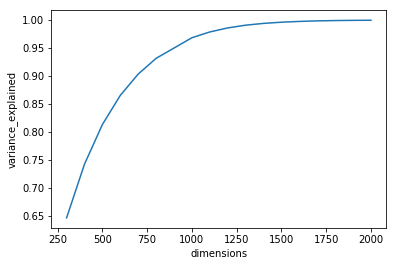

In [22]:
plt.plot(dimensions,var_explained)
plt.xlabel('dimensions')
plt.ylabel('variance_explained')
plt.show()

In [25]:
svd = TruncatedSVD(n_components=1200)
bigram_featues_df_svd = svd.fit_transform(bigram_featues_df)
variance = svd.explained_variance_ratio_.sum()
print("percentage of information regained after dimensinality reduction ",variance*100)

percentage of information regained after dimensinality reduction  98.58927304617123


In [30]:
bigram_featues_df_svd_df = pd.DataFrame(bigram_featues_df_svd)

In [72]:
bigrams_features_final_after_svd = pd.concat([file_id_df,bigram_featues_df_svd_df],axis=1)

bigrams_features_final_after_svd.head(2)

,File_id,0,1,2,3,4,5,6,7,8,...,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199
0,FdTt7i63rIxeSv1scBn0.txt,30156.616823,-4066.865983,664.655985,2112.839610,-118.240479,-1989.146125,-566.544750,2314.666945,4995.985969,...,-3582.776620,1324.793420,-5084.917297,-275.402010,-430.032384,-9589.266850,-299.923713,150.773073,2132.341162,1286.285765
1,5HaZbvxGcFQVgT642nWN.txt,1641.397451,18.807076,-34.228049,-57.166497,60.977337,134.541573,45.795455,117.585161,184.674563,...,-35.394104,-1.998414,7.538831,-31.407902,57.637872,-65.450702,-9.400012,-15.566686,26.564034,-51.266193


In [73]:
bigrams_features_final_after_svd.to_csv("bigrams_features_final_after_svd.csv",index=False)

## Image Representation of ASM Files

In [11]:
#threshold for multiprocessing
files=os.listdir('asmFiles/')
thres = int(len(files)/8)

In [13]:
from IPython.display import Image,display
import numpy as np
import scipy.misc, os, array
import matplotlib.pyplot as plt
%matplotlib inline

def generate_image(i):
    
    files=os.listdir('asmFiles/')
    
    from_index = int((i-1)*thres)
    to_index = int(i*thres)
    
    if i == 1:
        from_index = 0
        to_index = int(i*thres)
    if i == 8:
        from_index = int((i-1)*thres)
        to_index = len(files)
       
    for file in tqdm(files[from_index:to_index]):
        file_id = file.split('.')[0]
        filename = 'asmFiles/' +file
        f = open(filename,'rb')
        ln = os.path.getsize(filename)
        width = int(ln**0.5)
        rem = ln%width
        a = array.array("B")
        a.fromfile(f,ln-rem)
        f.close()
        g = np.reshape(a,(int(len(a)/width),width))
        g = np.uint8(g)
        scipy.misc.imsave("imagefiles/"+str(file_id)+".png",g)  

def main():
    
    manager=multiprocessing.Manager()
    
    p1=Process(target=generate_image,args=(1,))
    p2=Process(target=generate_image,args=(2,))
    p3=Process(target=generate_image,args=(3,))
    p4=Process(target=generate_image,args=(4,))
    p5=Process(target=generate_image,args=(5,))
    p6=Process(target=generate_image,args=(6,))
    p7=Process(target=generate_image,args=(7,))
    p8=Process(target=generate_image,args=(8,))
    
    p1.start()
    p2.start()
    p3.start()
    p4.start()
    p5.start()
    p6.start()
    p7.start()
    p8.start()
    p1.join()
    p2.join()
    p3.join()
    p4.join()
    p5.join()
    p6.join()
    p7.join()
    p8.join()


if __name__ == "__main__":
    main()

100%|██████████| 1358/1358 [23:53<00:00,  2.56it/s]


In [14]:
files=os.listdir('imagefiles/')
print("Number of images generated : ",len(files))

Number of images generated :  10868


## Featurizing images with VGG16

In [2]:
from keras.applications.vgg16 import VGG16

vgg_model = VGG16(include_top=False, weights='imagenet',input_shape=(224,224,3))

Using TensorFlow backend.


In [3]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

files=os.listdir('imagefiles/')

matrixx =[]
col_names = np.array(','.join(['%s_%i'%('asm_image_feature',x)for x in range(0,7 * 7 * 512)]))

row_names =[]
for file in tqdm(files):
    file_path = 'imagefiles/'+file
    img = image.load_img(file_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    preds = vgg_model.predict(img_data)
    bottleneck_features = np.reshape(preds, (7 * 7 * 512))
    matrixx.append(bottleneck_features)
    row_names.append(file.split('.')[0])   

100%|██████████| 10868/10868 [3:20:54<00:00,  1.13s/it] 


In [4]:
from scipy import sparse
fearues_sparse_format = sparse.csr_matrix(matrixx)

In [5]:
import pickle as pkl
with open('microsoft_bottleneck_features.pkl','wb') as f:
    pkl.dump([fearues_sparse_format,row_names],f)

# Data visualization

In [3]:
from IPython.display import Image,display
import numpy as np
import scipy.misc, os, array
import matplotlib.pyplot as plt
%matplotlib inline



class_labels =pd.read_csv("trainLabels.csv")

for i in range(1,10) :
    #print("image_representation of file with class label :",i)
    
    file_name = class_labels[class_labels['Class']==i]['Id'].iloc[0]
    file_name = 'asmFiles/' + file_name +".asm"
    f = open(file_name,'rb')
    ln = os.path.getsize(file_name)
    width = int(ln**0.5)
    rem = ln%width
    a = array.array("B")
    a.fromfile(f,ln-rem)
    f.close()
    g = np.reshape(a,(int(len(a)/width),width))
    g = np.uint8(g)
    scipy.misc.imsave("class_label_"+str(i)+".png",g)    

Below is the image_representation of file with class label : 1


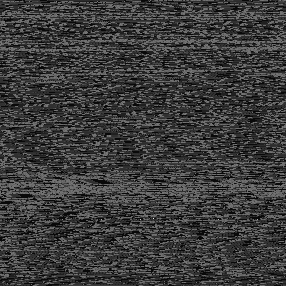




Below is the image_representation of file with class label : 3


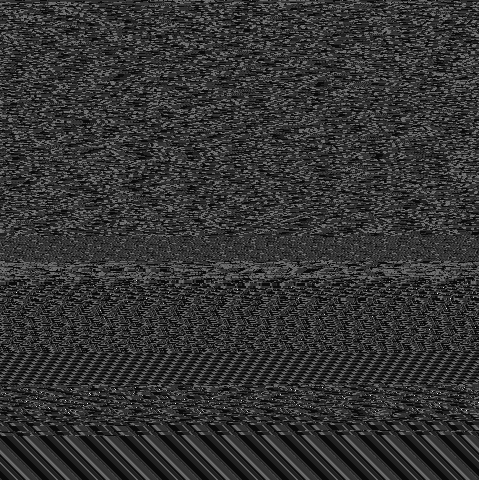




Below is the image_representation of file with class label : 4


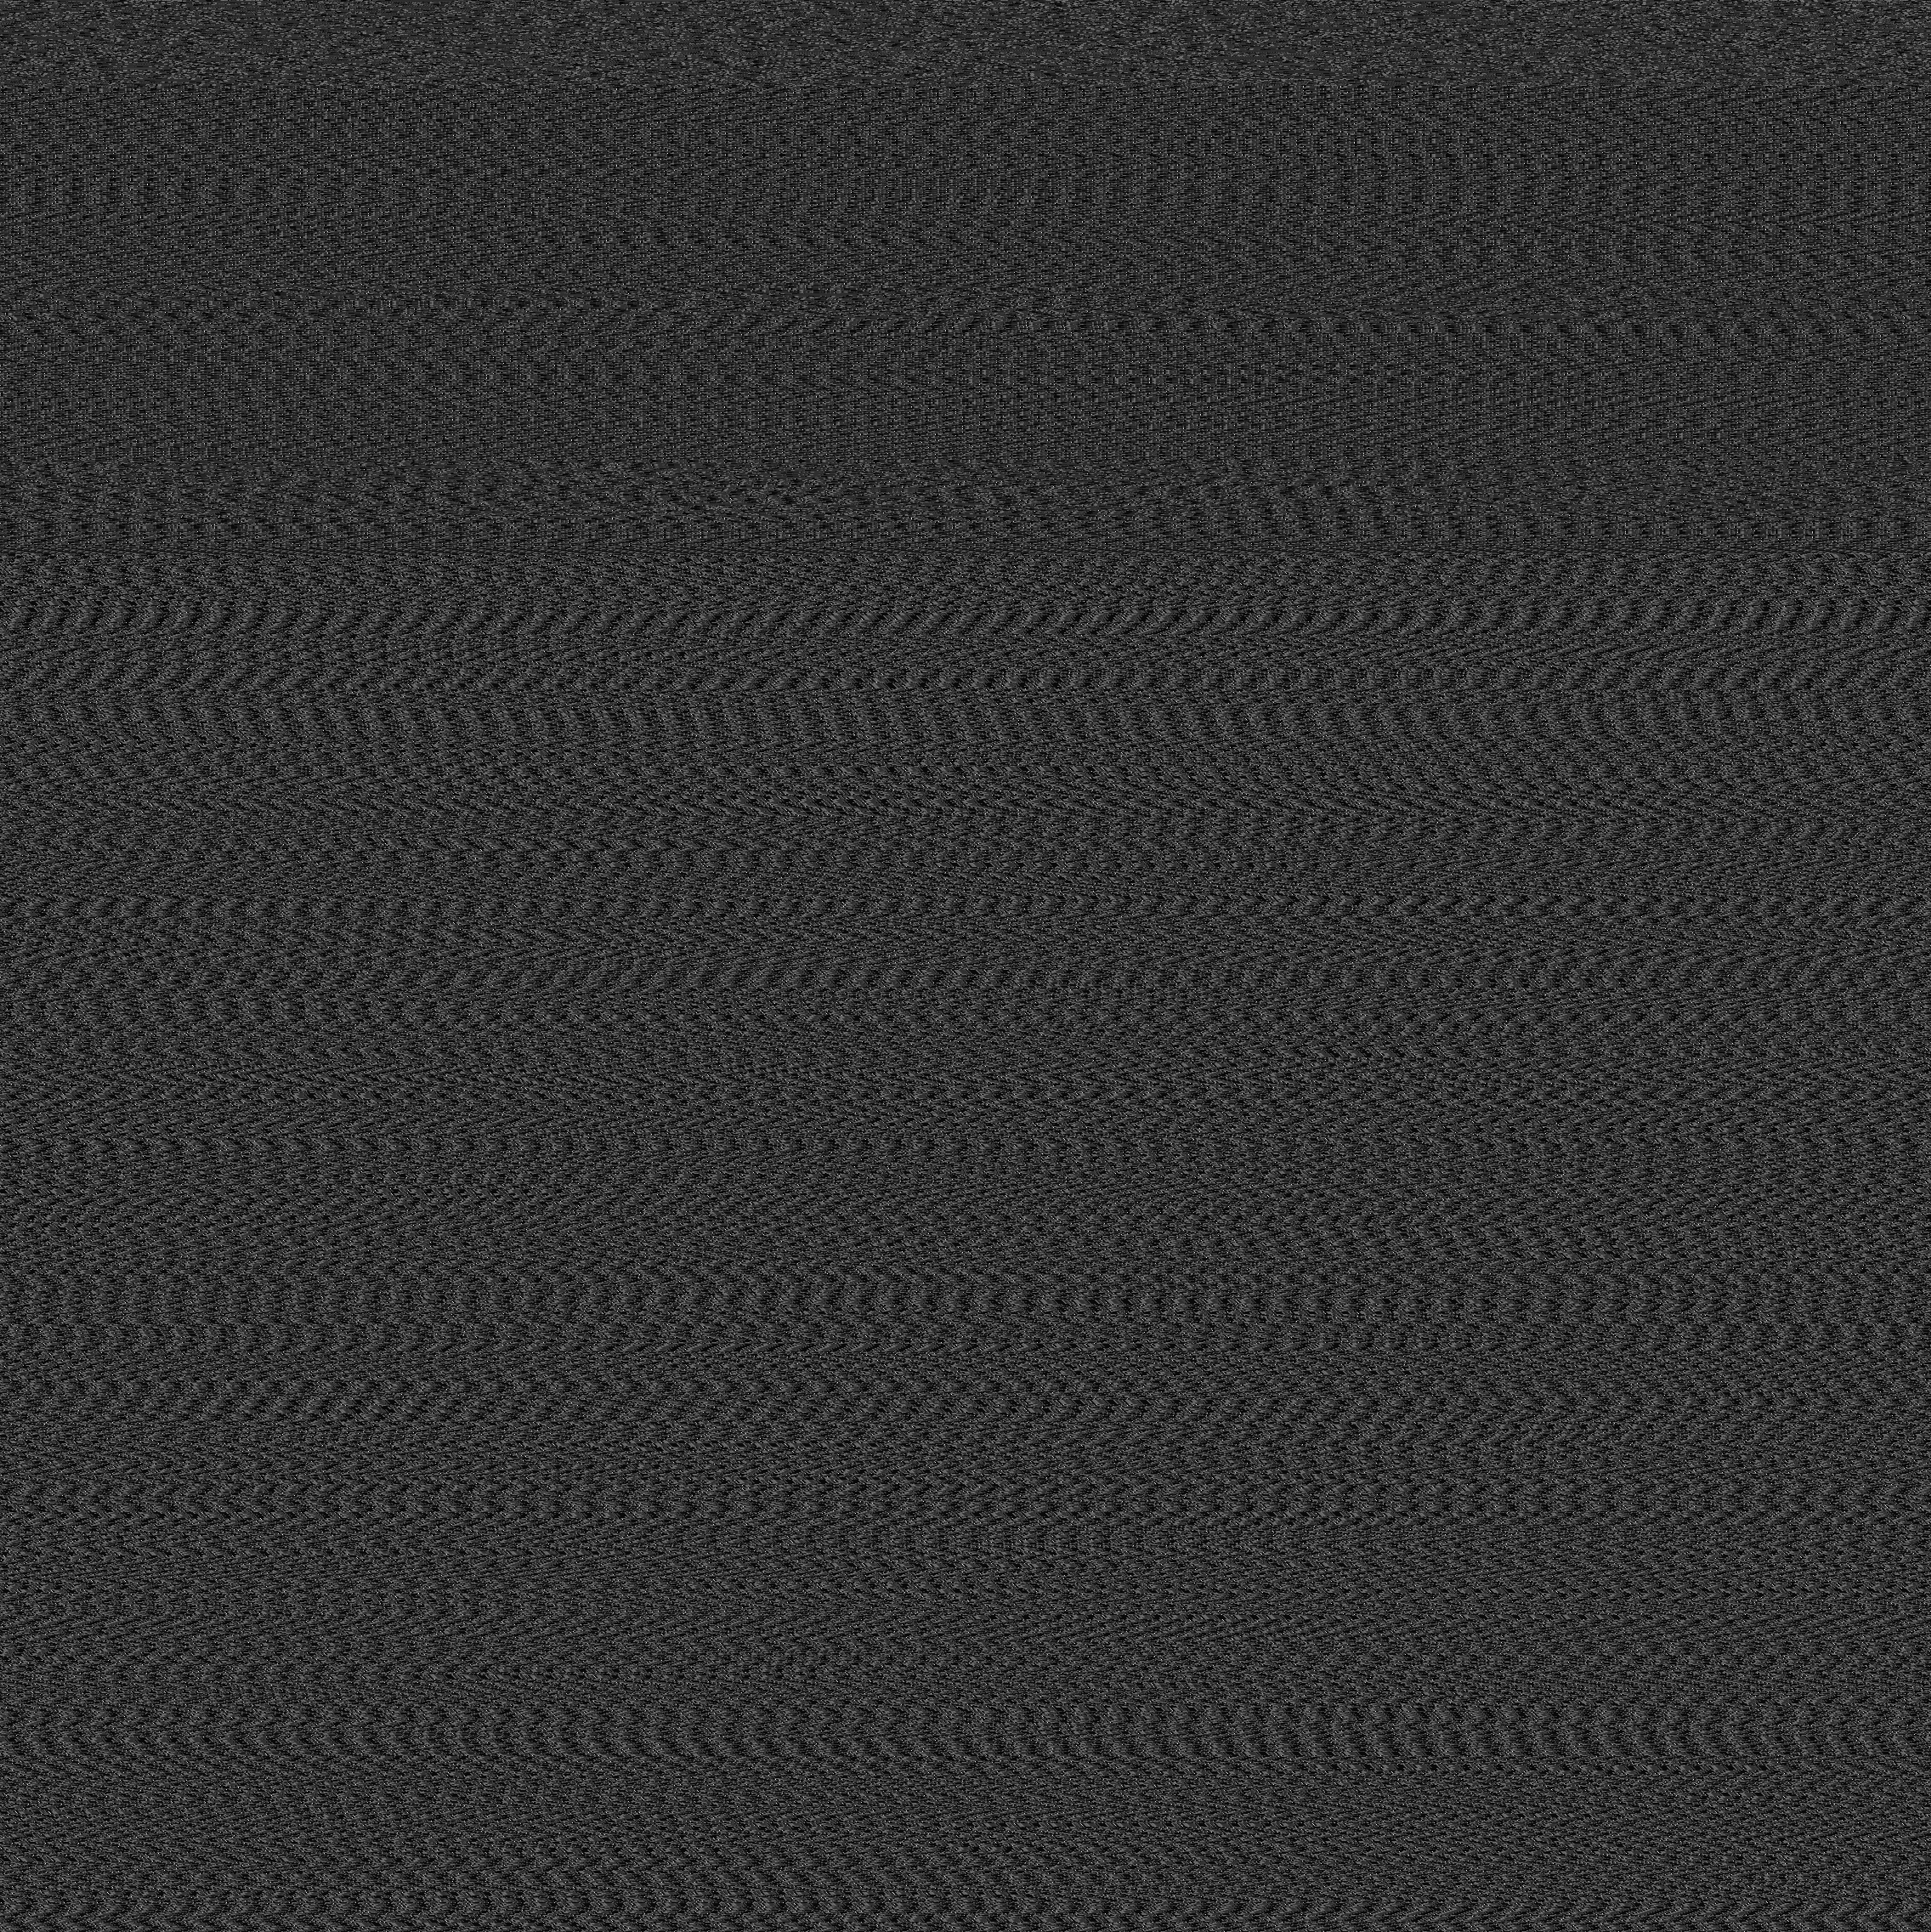




Below is the image_representation of file with class label : 6


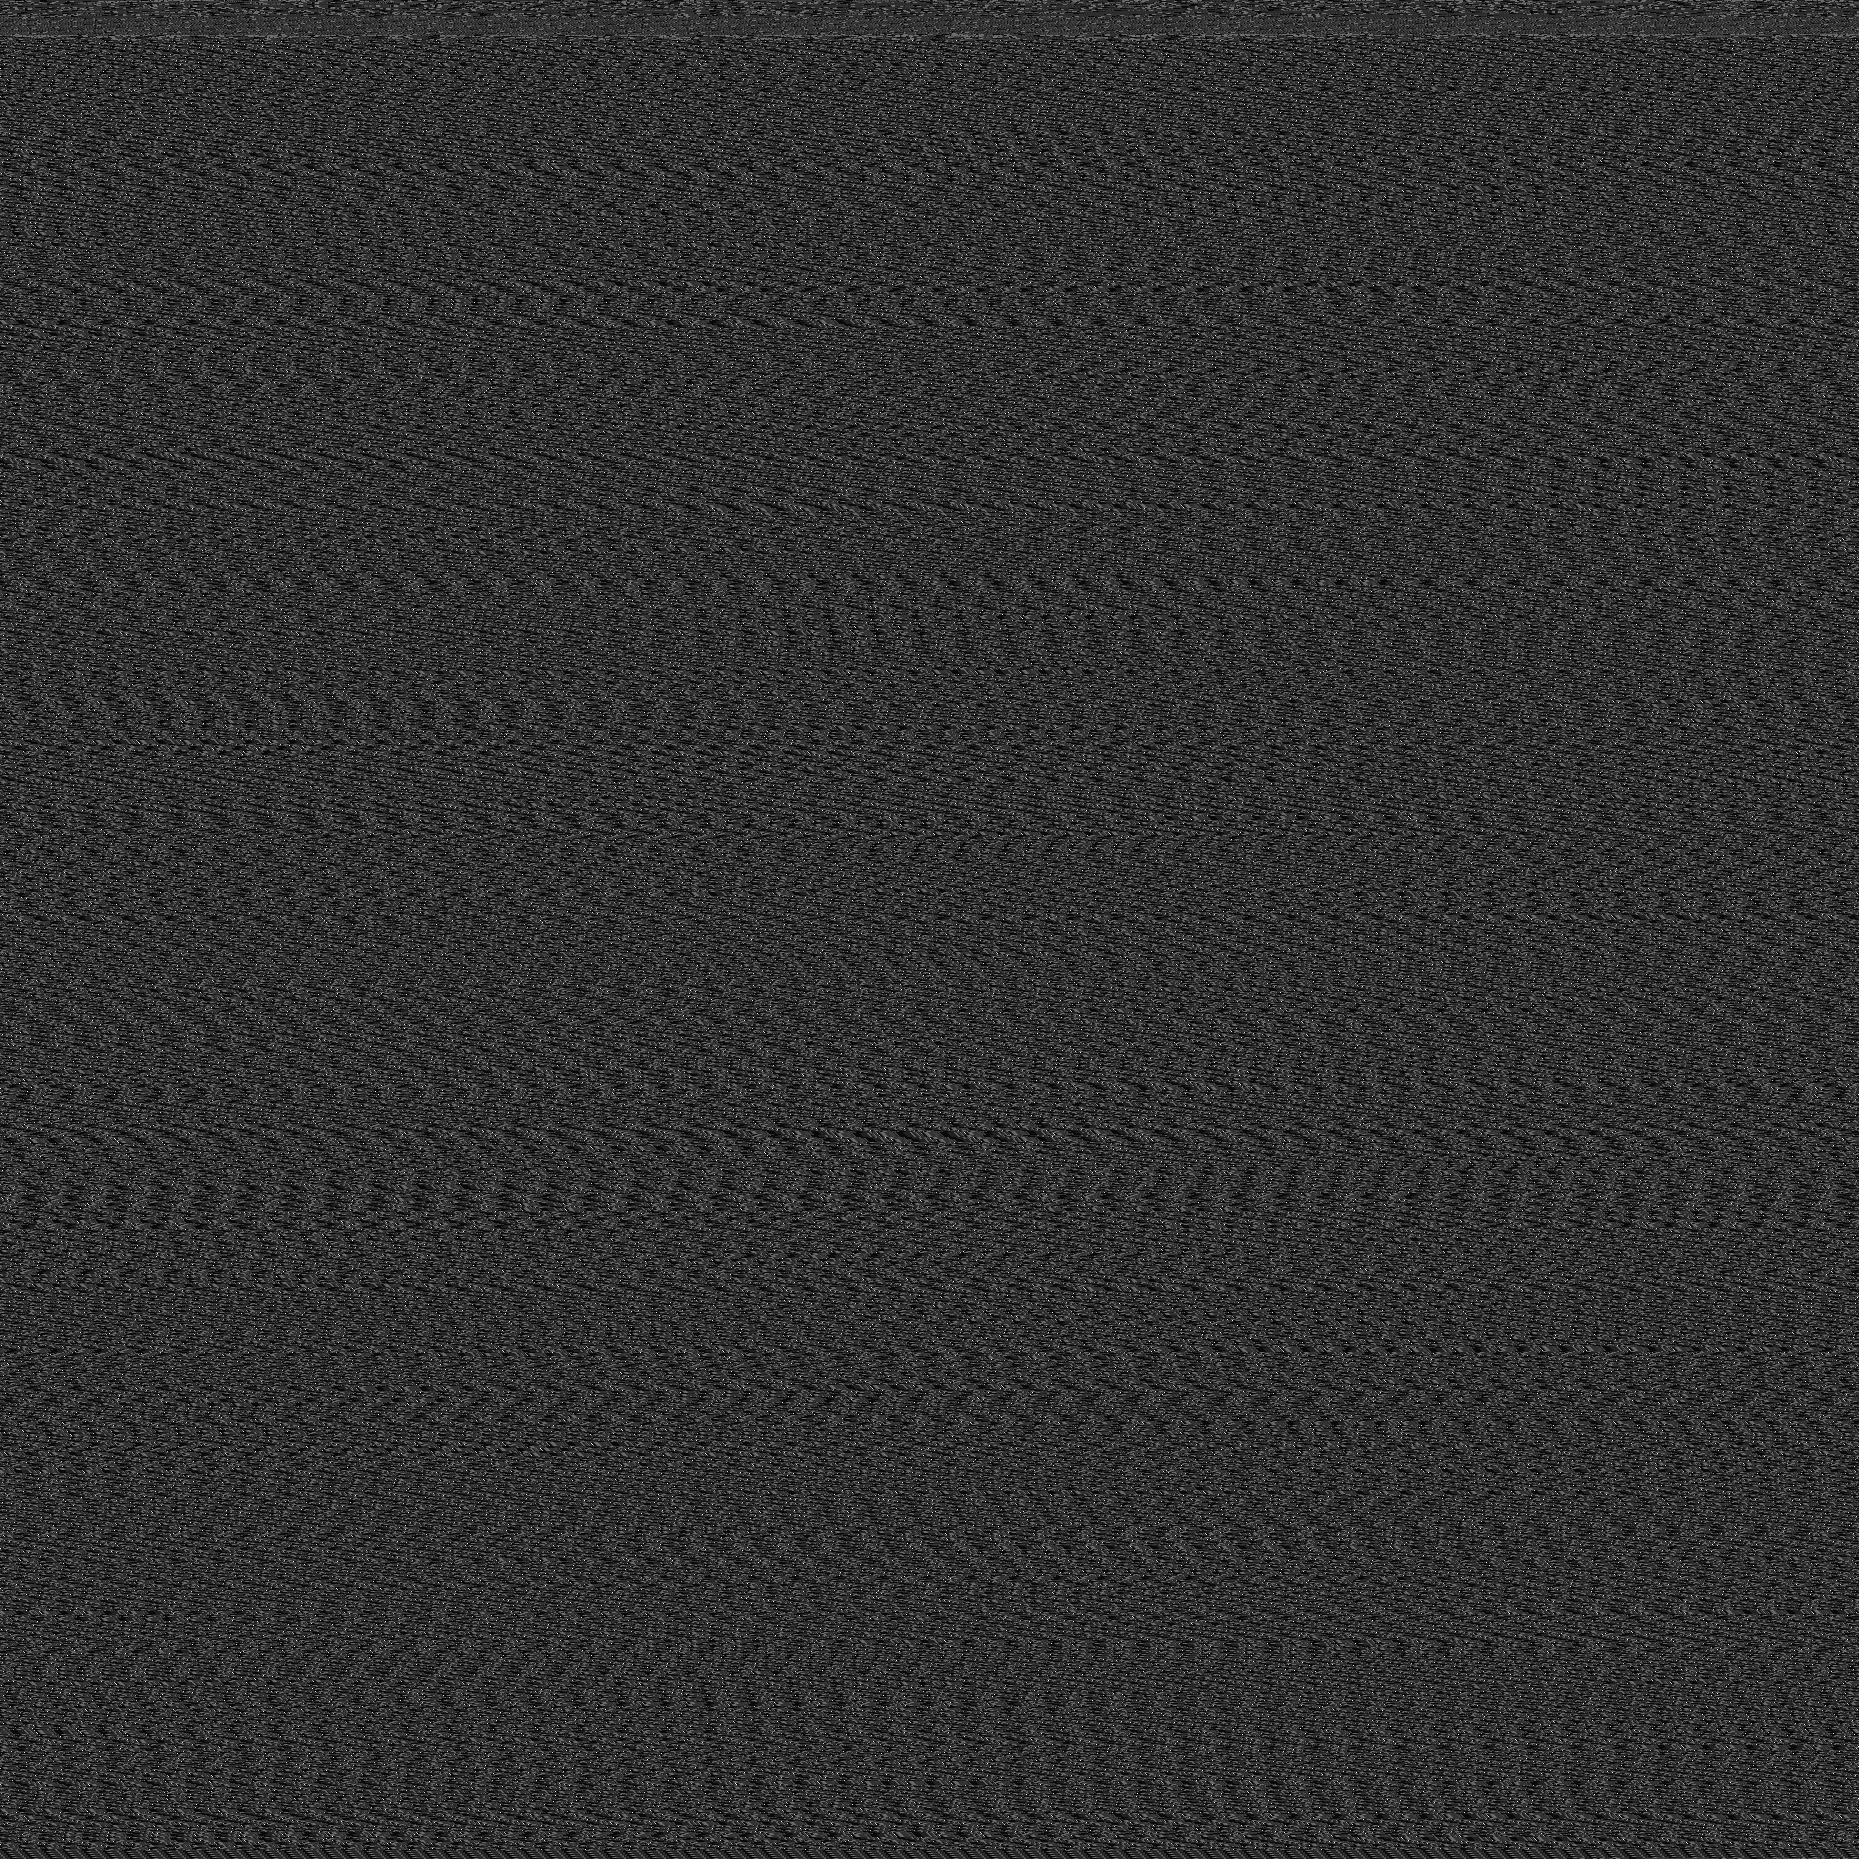




Below is the image_representation of file with class label : 7


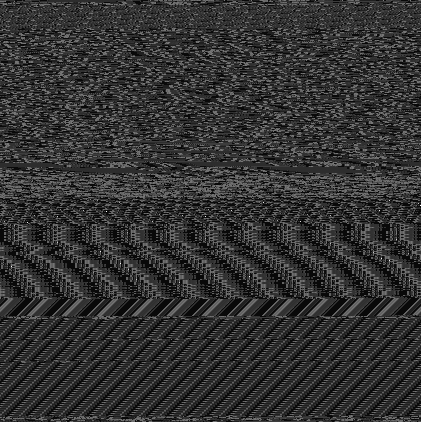




Below is the image_representation of file with class label : 8


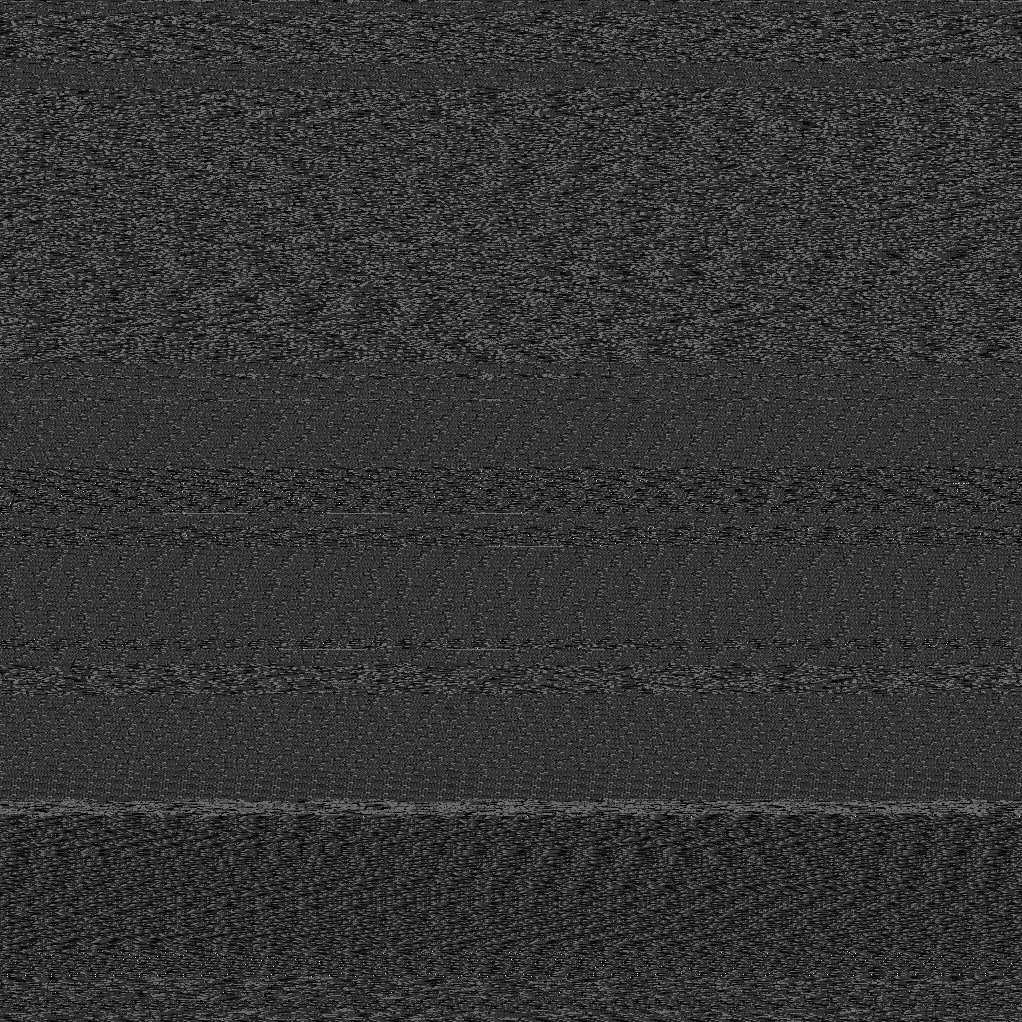

In [2]:
from IPython.display import Image,display

#Note : file size of class 9, class 2, class 5 are large and hence avoided displaying them.

for i in list1 :
    
    print("Below is the image_representation of file with class label :",i)
    display(Image("class_label_"+str(i)+".png",width=300, height=300))
    print("\n\n")

## T-SNE visualization of bi-grams of Byte Files

In [7]:
from sklearn.preprocessing import scale
bigrams_features_final_after_svd = pd.read_csv("bigrams_features_final_after_svd.csv")
bigrams_features_final_after_svd.rename(columns={'File_id':'Id'}, inplace=True)
bigrams_features_final_after_svd['Id'] = bigrams_features_final_after_svd['Id'].apply(lambda row: row.split(".")[0])
class_labels = pd.read_csv('trainLabels.csv')
final_features_with_class_labels =pd.merge(bigrams_features_final_after_svd,class_labels,on='Id',how='left')
result_y = final_features_with_class_labels['Class']
results = final_features_with_class_labels.drop(labels=['Id','Class'],axis=1)
results = scale(results)

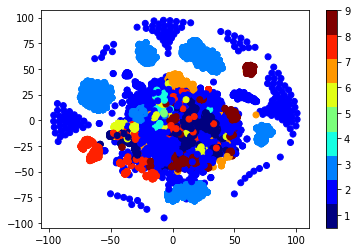

In [10]:
from sklearn.manifold import TSNE

xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(results)
vis_x = results[:, 0]
vis_y = results[:, 1]

plt.scatter(vis_x, vis_y, c=result_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

observation:
    * few datapoints of same class have clustered together.

# Modeling

In [7]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
   
    
    B =(C/C.sum(axis=0))
   
    labels = [1,2,3,4,5,6,7,8,9]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

### Data Preparation ( Rearranging  rows of the sparse matrix  according to the datapoints of class_labels )

In [11]:
class_labels = pd.read_csv('trainLabels.csv')
row_names = np.array(row_names) # each value in 'row_names' represent a row id of the sparse matrix (fearues_sparse_format).

In [17]:
# the sparse matrix (fearues_sparse_format) is the representation of VGG16 bottleneck features of each data point
from scipy.sparse import vstack

id_ = class_labels['Id'].iloc[0]    # id_ = file ID
row_idx, = np.where(row_names == id_) # gets the row index of the sparse matrix
ordered_sparse_matrix = fearues_sparse_format[row_idx] # retrives the corresponding row

for index in tqdm(range(1,class_labels.shape[0])):
    
    id_ = class_labels['Id'].iloc[index]
    
    row_idx, = np.where(row_names == id_)
    
    new_matrix = fearues_sparse_format[row_idx]
    
    ordered_sparse_matrix = vstack([ordered_sparse_matrix,new_matrix]) 
    

100%|██████████| 10867/10867 [10:50<00:00,  7.73it/s]


In [18]:
import pickle as pkl
with open('ordered_microsoft_bottleneck_features.pkl','wb') as f:
    pkl.dump([ordered_sparse_matrix],f)

## Applying Logistic Regression on VGG16 Bottleneck Features

In [2]:
import pickle as pkl
with open('ordered_microsoft_bottleneck_features.pkl','rb') as f:
    [ordered_sparse_matrix] = pkl.load(f)

In [3]:
class_labels = pd.read_csv('trainLabels.csv')
result_y = class_labels['Class'].values

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test_merge, y_train, y_test_merge = train_test_split(ordered_sparse_matrix, result_y,stratify=result_y,test_size=0.20)

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
tuned_parameters={
    'C' : [10**-5,10**-4,10**-3,10**-2,10**0,10**1]

}
model = GridSearchCV(LogisticRegression(class_weight = 'balanced',n_jobs=-1), tuned_parameters, scoring = 'neg_log_loss', cv=3,n_jobs=-1,return_train_score =True)
model.fit(X_train,y_train)
print(model.best_estimator_)

LogisticRegression(C=0.001, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


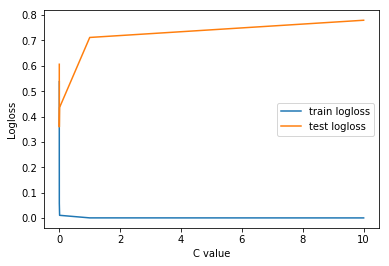

In [9]:
%matplotlib inline 
cv_scores = pd.DataFrame(model.cv_results_)
cv_scores = cv_scores.sort_values(by =['param_C'])

plt.plot(cv_scores['param_C'],-cv_scores['mean_train_score'],label='train logloss')
plt.plot(cv_scores['param_C'],-cv_scores['mean_test_score'],label='test logloss')

plt.xlabel('C value')
plt.ylabel('Logloss')
plt.legend()
plt.show()

The train log loss is: 0.05816745838479608
The test log loss is: 0.30534827126946923
----------------------------------------
Test accuracy: 0.9277828886844526
-------------------------------------------------- Confusion matrix --------------------------------------------------


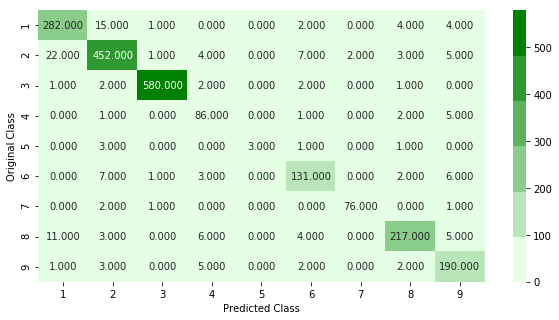

-------------------------------------------------- Precision matrix --------------------------------------------------


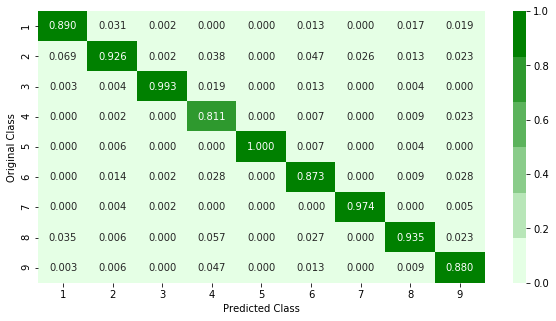

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


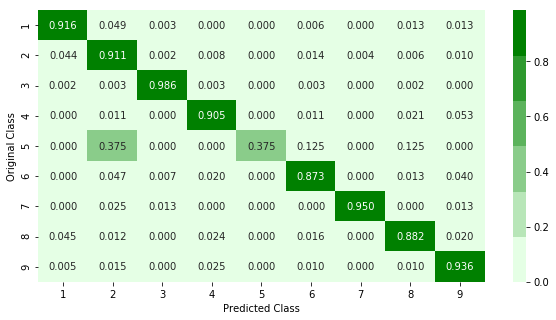

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [13]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix

predict_y =  model.best_estimator_.predict_proba(X_train)
print("The train log loss is:",log_loss(y_train, predict_y, labels= model.best_estimator_.classes_, eps=1e-15))
predict_y =  model.best_estimator_.predict_proba(X_test_merge)
print("The test log loss is:",log_loss(y_test_merge, predict_y, labels= model.best_estimator_.classes_, eps=1e-15))

print("-"*40)

y_pred = model.best_estimator_.predict(X_test_merge)
score = accuracy_score(y_test_merge,y_pred)
print("Test accuracy:",score)

plot_confusion_matrix(y_test_merge,model.best_estimator_.predict(X_test_merge))

## Applying XG-BOOST on Bi-gram Representation on Byte Files

In [21]:
bigrams_features_final_after_svd = pd.read_csv("bigrams_features_final_after_svd.csv")
bigrams_features_final_after_svd.rename(columns={'File_id':'Id'}, inplace=True)
bigrams_features_final_after_svd['Id'] = bigrams_features_final_after_svd['Id'].apply(lambda row: row.split(".")[0])
class_labels = pd.read_csv('trainLabels.csv')
final_features_with_class_labels =pd.merge(bigrams_features_final_after_svd,class_labels,on='Id',how='left')
result_y = final_features_with_class_labels['Class']
final_features_with_class_labels = final_features_with_class_labels.drop(labels=['Id','Class'],axis=1)

In [23]:
from sklearn.preprocessing import scale
final_features_with_class_labels = scale(final_features_with_class_labels)
result_y = result_y.values

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test_merge, y_train, y_test_merge = train_test_split(final_features_with_class_labels, result_y,stratify=result_y,test_size=0.20)

In [25]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
tuned_parameters={
    'max_depth' : [2,3,4],
    'n_estimators': [25,55,75],
    'learning_rate':[1,0.1],
    'reg_alpha':[1,10],
    'objective':['binary:logistic'],
    'eval_metric':['logloss'],
    'booster':['gbtree'],
}
xgb_model = xgb.XGBClassifier()
model = GridSearchCV(xgb_model, tuned_parameters, scoring = 'neg_log_loss', cv=3,n_jobs=-1,return_train_score =True)
model.fit(X_train,y_train)
print(model.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eval_metric='logloss', gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=75, n_jobs=1,
       nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [26]:
xgb_model = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eval_metric='logloss', gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
       nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eval_metric='logloss', gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
       nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

Train log loss : 0.0038
Test log loss : 0.0451
-------------------------------------------------- Confusion matrix --------------------------------------------------


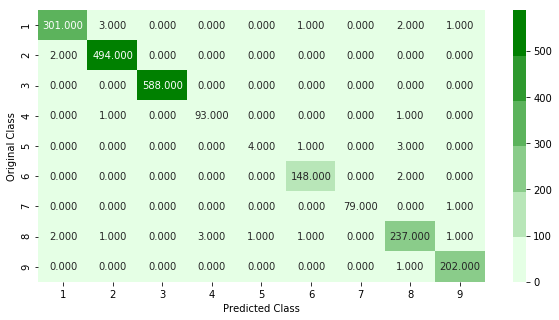

-------------------------------------------------- Precision matrix --------------------------------------------------


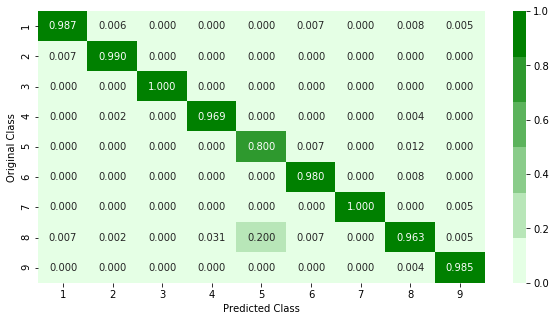

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


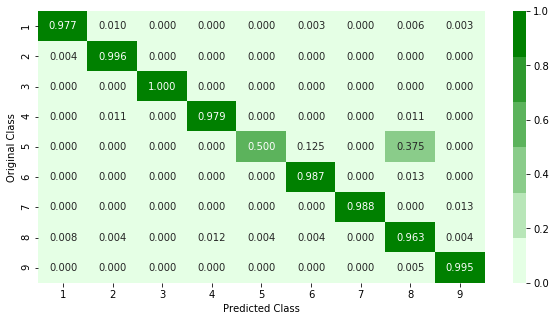

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import log_loss

y_prob = xgb_model.predict_proba(X_train)
score = log_loss(y_train,y_prob)
print("Train log loss :",np.round(score,decimals=4))


y_prob = xgb_model.predict_proba(X_test_merge)
score = log_loss(y_test_merge,y_prob)
print("Test log loss :",np.round(score,decimals=4))

import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix
%matplotlib inline

y_prob = xgb_model.predict(X_test_merge)
plot_confusion_matrix(y_test_merge,y_prob)

### Applying XG-BOOST on Bi-gram of Byte files and  control flow graph features

In [2]:
from sklearn.preprocessing import scale
bigrams_features_final_after_svd = pd.read_csv("bigrams_features_final_after_svd.csv")
bigrams_features_final_after_svd.rename(columns={'File_id':'Id'}, inplace=True)
bigrams_features_final_after_svd['Id'] = bigrams_features_final_after_svd['Id'].apply(lambda row: row.split(".")[0])
call_graph_dchad_features = pd.read_csv('final-combined-train-data-30percent.csv')
call_graph_dchad_features.rename(columns={'filename':'Id'}, inplace=True)
class_labels = pd.read_csv('trainLabels.csv')
final_features_with_class_labels =pd.merge(bigrams_features_final_after_svd,call_graph_dchad_features,on='Id',how='left')
final_features_with_class_labels =pd.merge(final_features_with_class_labels,class_labels,on='Id',how='left')
final_features_with_class_labels = final_features_with_class_labels.sort_values(by=['Id'],axis=0)


result_y = final_features_with_class_labels['Class']
result_y = result_y.values
final_features = final_features_with_class_labels.drop(labels=['Id','Class'],axis=1)
final_features = scale(final_features)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test_merge, y_train, y_test_merge = train_test_split(final_features, result_y,stratify=result_y,test_size=0.20)

In [9]:
tuned_parameters={
    'max_depth' : [2,3,4],
    'n_estimators': [25,55,75],
    'learning_rate':[1,0.1],
    'reg_alpha':[1,10],
    'objective':['binary:logistic'],
    'eval_metric':['logloss'],
    'booster':['gbtree'],
}
xgb_model = xgb.XGBClassifier()
model = GridSearchCV(xgb_model, tuned_parameters, scoring = 'neg_log_loss', cv=3,n_jobs=-1,return_train_score =True)
model.fit(X_train,y_train)
print(model.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eval_metric='logloss', gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=75, n_jobs=1,
       nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [10]:
xgb_model = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eval_metric='logloss', gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
       nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eval_metric='logloss', gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
       nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [15]:
y_prob = xgb_model.predict_proba(X_train)
score = log_loss(y_train,y_prob)
print("Train log loss :",np.round(score,decimals=4))


y_prob = xgb_model.predict_proba(X_test_merge)
score = log_loss(y_test_merge,y_prob)
print("Test log loss :",np.round(score,decimals=4))

Train log loss : 0.002
Test log loss : 0.0077


-------------------------------------------------- Confusion matrix --------------------------------------------------


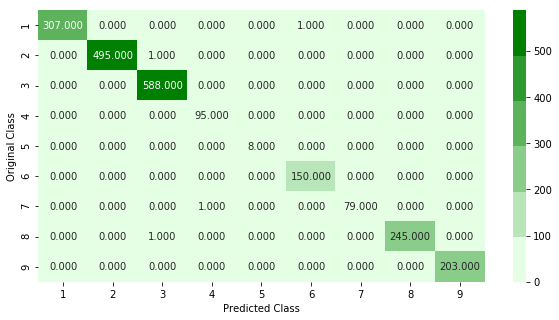

-------------------------------------------------- Precision matrix --------------------------------------------------


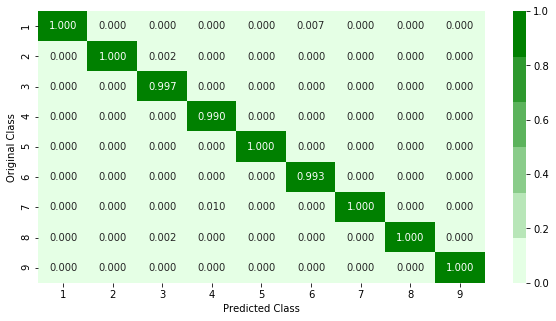

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


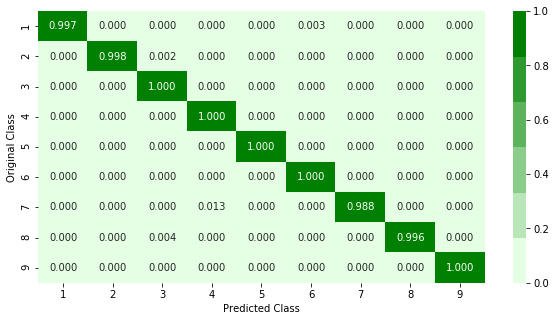

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [20]:
y_prob = xgb_model.predict(X_test_merge)
plot_confusion_matrix(y_test_merge,y_prob)

# Conclusion

In [3]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Featurization Type",'Model',"Hyper-Parameters","log loss"]
x.add_row(['VGG16 Bottleneck features of IMAGE Representation\n of ASM Files\n\n\n ','Logistic Regression','C=0.001','0.305'])
x.add_row(['Bi-gram Representation of BYTE Files','XG BOOST','n_estimators =1000\n max_depth=4 \n learning rate =0.1\nreg_alpha=1\n\n\n','0.0451'])

x.add_row(['Bi-gram Representation of BYTE Files\nalong with control flow graph features  ','XG BOOST','n_estimators =1000\n max_depth=3 \n learning rate =0.1\nreg_alpha=1\n','0.0077'])
print(x)

+---------------------------------------------------+---------------------+---------------------+----------+
|                 Featurization Type                |        Model        |   Hyper-Parameters  | log loss |
+---------------------------------------------------+---------------------+---------------------+----------+
| VGG16 Bottleneck features of IMAGE Representation | Logistic Regression |       C=0.001       |  0.305   |
|                    of ASM Files                   |                     |                     |          |
|                                                   |                     |                     |          |
|                                                   |                     |                     |          |
|                                                   |                     |                     |          |
|        Bi-gram Representation of BYTE Files       |       XG BOOST      |  n_estimators =1000 |  0.0451  |
|                  

# Procedure

* It was clear that the main objective for this bussiness problem was to identify whether a given piece of file/software is a malware.

* Preprocessed data and basic data analysis.

* Extracted Feature from Byte Files.

* As it was taking so long to featurize the bi-grams of byte files, I had computed bi-grams of byte files by multi-threading.

* Reduced dimensions of the byte files using Truncated SVD.

* Converted each ASM file into an image.

* Extracted VGG16 Bottleneck features from the images.

* Visualized Image representation of ASM Files.

* Visualized the bi-grams of byte files using T-sne.

* Applied Logistic regression on VGG16 Bottleneck features of images, which yielded an accuracy of 92.7%

* Applied XG Boost on Bi-gram Representation of BYTE Files, which performed very well than uni-grams representation.

* with the reference of 'dchad' github account (https://github.com/dchad/malware-detection), decreased the logloss  by applying xgboost

* Compared all the models using pretty table.

----------------------------------------------------------------------THE END --------------------------------------------------------------------